In [25]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,	precision_score, silhouette_score, silhouette_samples
from sklearn.metrics.cluster import normalized_mutual_info_score

In [2]:
####### Read in dataset ########
trainfile = "train.csv"
train_df = pd.read_csv(trainfile, engine='python', on_bad_lines='skip')
train_df = train_df.drop(columns=["title", "author"])
print("Training Sample:\n", train_df.head(), "\n________________________________________________________________")

Training Sample:
    id                                               text  label
0   0  house dem aide even see comey letter jason cha...      1
1   1  ever get feeling life circles roundabout rathe...      0
2   2  truth might get fired october 29 2016 tension ...      1
3   3  videos 15 civilians killed single us airstrike...      1
4   4  print iranian woman sentenced six years prison...      1 
________________________________________________________________


In [3]:
###### Split data into training and testing components ######
x_train, x_test, y_train, y_test = train_test_split(train_df['text'], train_df.label, test_size=.2, random_state=7)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tr = np.array(tfidf_vectorizer.fit_transform(x_train.tolist()).todense())
X_te = np.array(tfidf_vectorizer.transform(x_test.tolist()).todense())

In [4]:
# Initialize PCA dimensionality reduction and KMeans instance instance
pca = PCA(n_components=2)
kmeans = KMeans(init="random", n_clusters=2, max_iter=1000, n_init=20)

In [5]:
# Fitting and Training
X_tr_dr = pca.fit_transform(X_tr)
y_tr = kmeans.fit_predict(X_tr_dr)

In [11]:
# Testing
x_te_dr = pca.transform(X_te)
y_te = kmeans.predict(x_te_dr)

In [21]:
score = silhouette_score(X_tr_dr, y_tr)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.555


In [20]:
score = silhouette_score(x_te_dr, y_te)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.565


In [26]:
print(normalized_mutual_info_score(y_train, y_tr))
print(normalized_mutual_info_score(y_test, y_te))

0.0014030129917170055
0.0036963262579272392


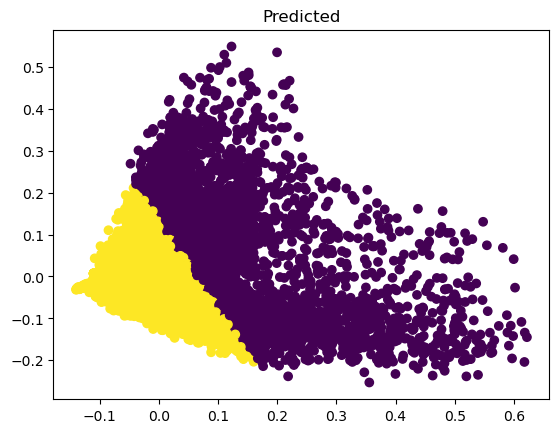

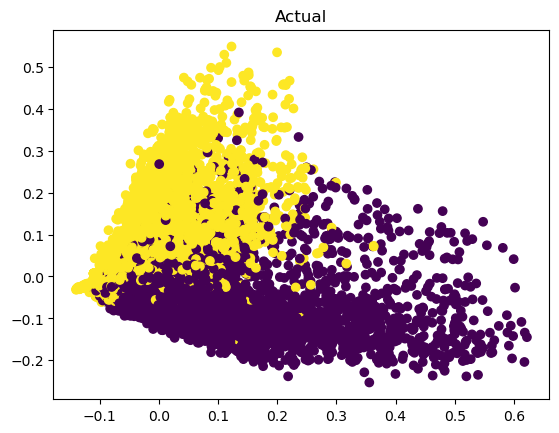

In [38]:
plt.scatter(X_tr_dr[:,0], X_tr_dr[:,1], c=y_tr)
plt.title("Predicted")
plt.show()
plt.scatter(X_tr_dr[:,0], X_tr_dr[:,1], c=y_train)
plt.title("Actual")
plt.show()

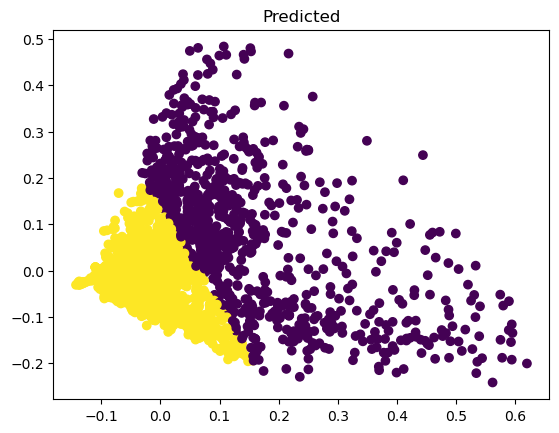

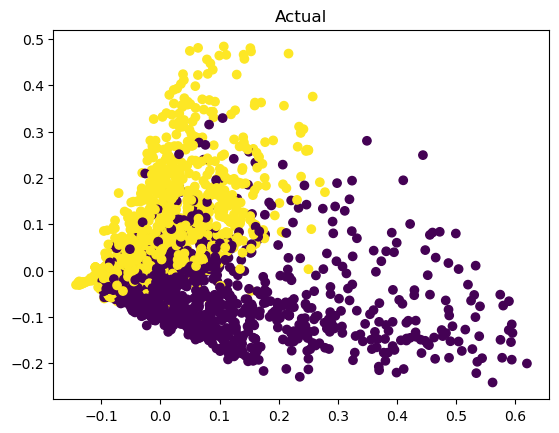

In [37]:
plt.scatter(x_te_dr[:,0], x_te_dr[:,1], c=y_te)
plt.title("Predicted")
plt.show()
plt.scatter(x_te_dr[:,0], x_te_dr[:,1], c=y_test)
plt.title("Actual")
plt.show()

In [40]:
from sklearn.metrics.cluster import pair_confusion_matrix
print(pair_confusion_matrix(y_train, y_tr))
print(pair_confusion_matrix(y_test, y_te))

[[40136846 74334786]
 [40202106 75895302]]
[[2586166 4578334]
 [2559958 4688954]]
